In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('./penguins_size.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [27]:
import EDAFunction
EDAFunction.percent_missing(df)

culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

In [28]:
df[df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [29]:
df = df.dropna()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [31]:
df['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [32]:
df['island'].value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [33]:
# def col_value_count(df):
#     for col in df.columns:
#         print(df[col].value_counts())

In [34]:
# col_value_count(df)

In [35]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [36]:
df = df[df['sex'] != '.']

In [37]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [38]:
cat_columns = ['species', 'island','sex']

In [39]:
def categorical_plot(cat_columns,df):
    size = len(cat_columns)
    fig, axes = plt.subplots(nrows=(size+1)//2, ncols=2, figsize=(12,(size+1)//2*5))
    for i,col in enumerate(cat_columns):
       row_index, col_index = divmod(i,2)
       sns.countplot(x=col,data=df, ax=axes[row_index][col_index])
       axes[row_index][col_index].set_title(col , fontsize=10)

    if size%2 == 1:
      fig.delaxes(axes[-1,-1])

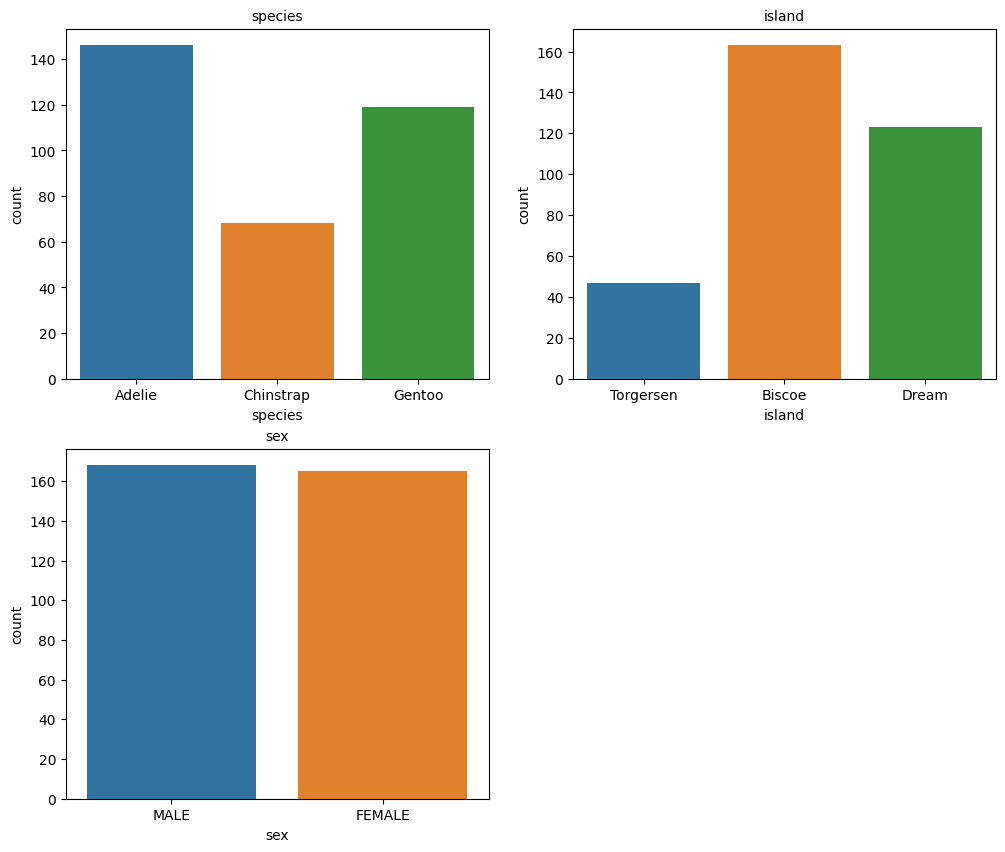

In [40]:
categorical_plot(cat_columns=cat_columns, df=df)

In [41]:
num_columns = []
for i,col in enumerate(df.columns):
    if col not in cat_columns:
        num_columns.append(col)

print(num_columns)

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


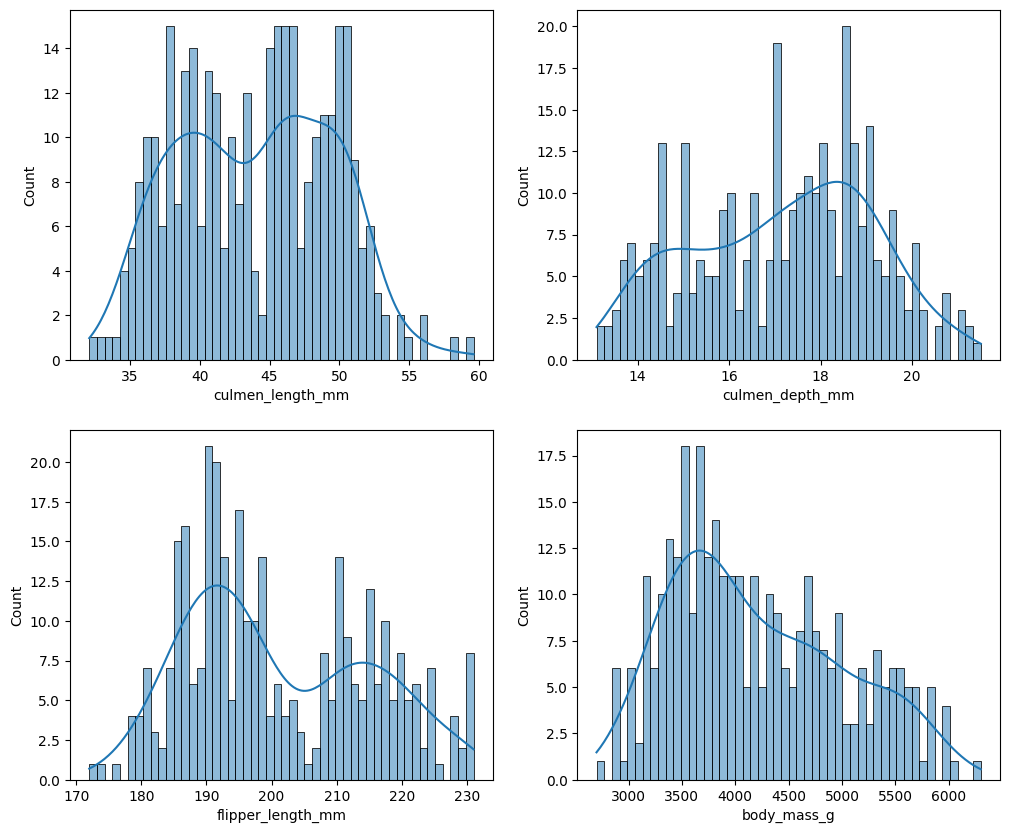

In [42]:
size = len(num_columns)
fig, axes = plt.subplots(nrows=(size+1)//2, ncols=2, figsize=(12,(size+1)//2*5))
for i,col in enumerate(num_columns):
    row_index, col_index = divmod(i,2)
    sns.histplot(x=col,data=df, ax=axes[row_index][col_index], kde= True, bins=50)
    # axes[row_index][col_index].set_title(col , fontsize=10)

if size%2 == 1:
    fig.delaxes(axes[-1,-1])

### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [47]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Model Build

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
tree = DecisionTreeClassifier()

In [51]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

def report_classification_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.show()
    

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.90      0.97      0.93        36
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      0.96      0.98        25

    accuracy                           0.94        84
   macro avg       0.95      0.93      0.94        84
weighted avg       0.94      0.94      0.94        84

Confusion Matrix:


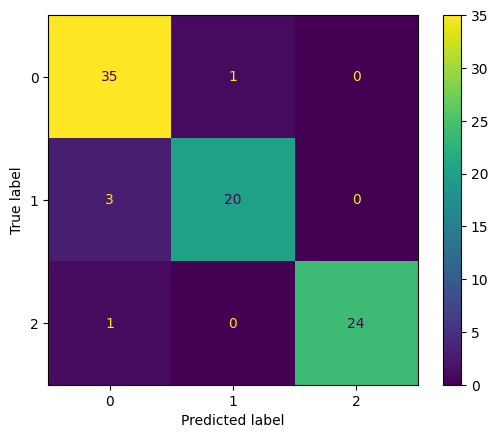

In [56]:
report_classification_model(tree, X_train, y_train, X_test, y_test)

In [57]:
tree.feature_importances_

array([0.34613003, 0.0288438 , 0.58936694, 0.        , 0.03565923,
       0.        , 0.        ])

In [82]:
imp_feat = pd.DataFrame(index=X.columns,data=tree.feature_importances_,columns=['Feature Importance'])

In [85]:
imp_feat 

,Feature Importance
culmen_length_mm,0.346130
culmen_depth_mm,0.028844
flipper_length_mm,0.589367
body_mass_g,0.000000
island_Dream,0.035659
island_Torgersen,0.000000
sex_MALE,0.000000


In [87]:
imp_feat = imp_feat.sort_values('Feature Importance',)

In [77]:
X_train.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

There are few missclassification in this model, we can firther reduce it with hyperparameter tuning

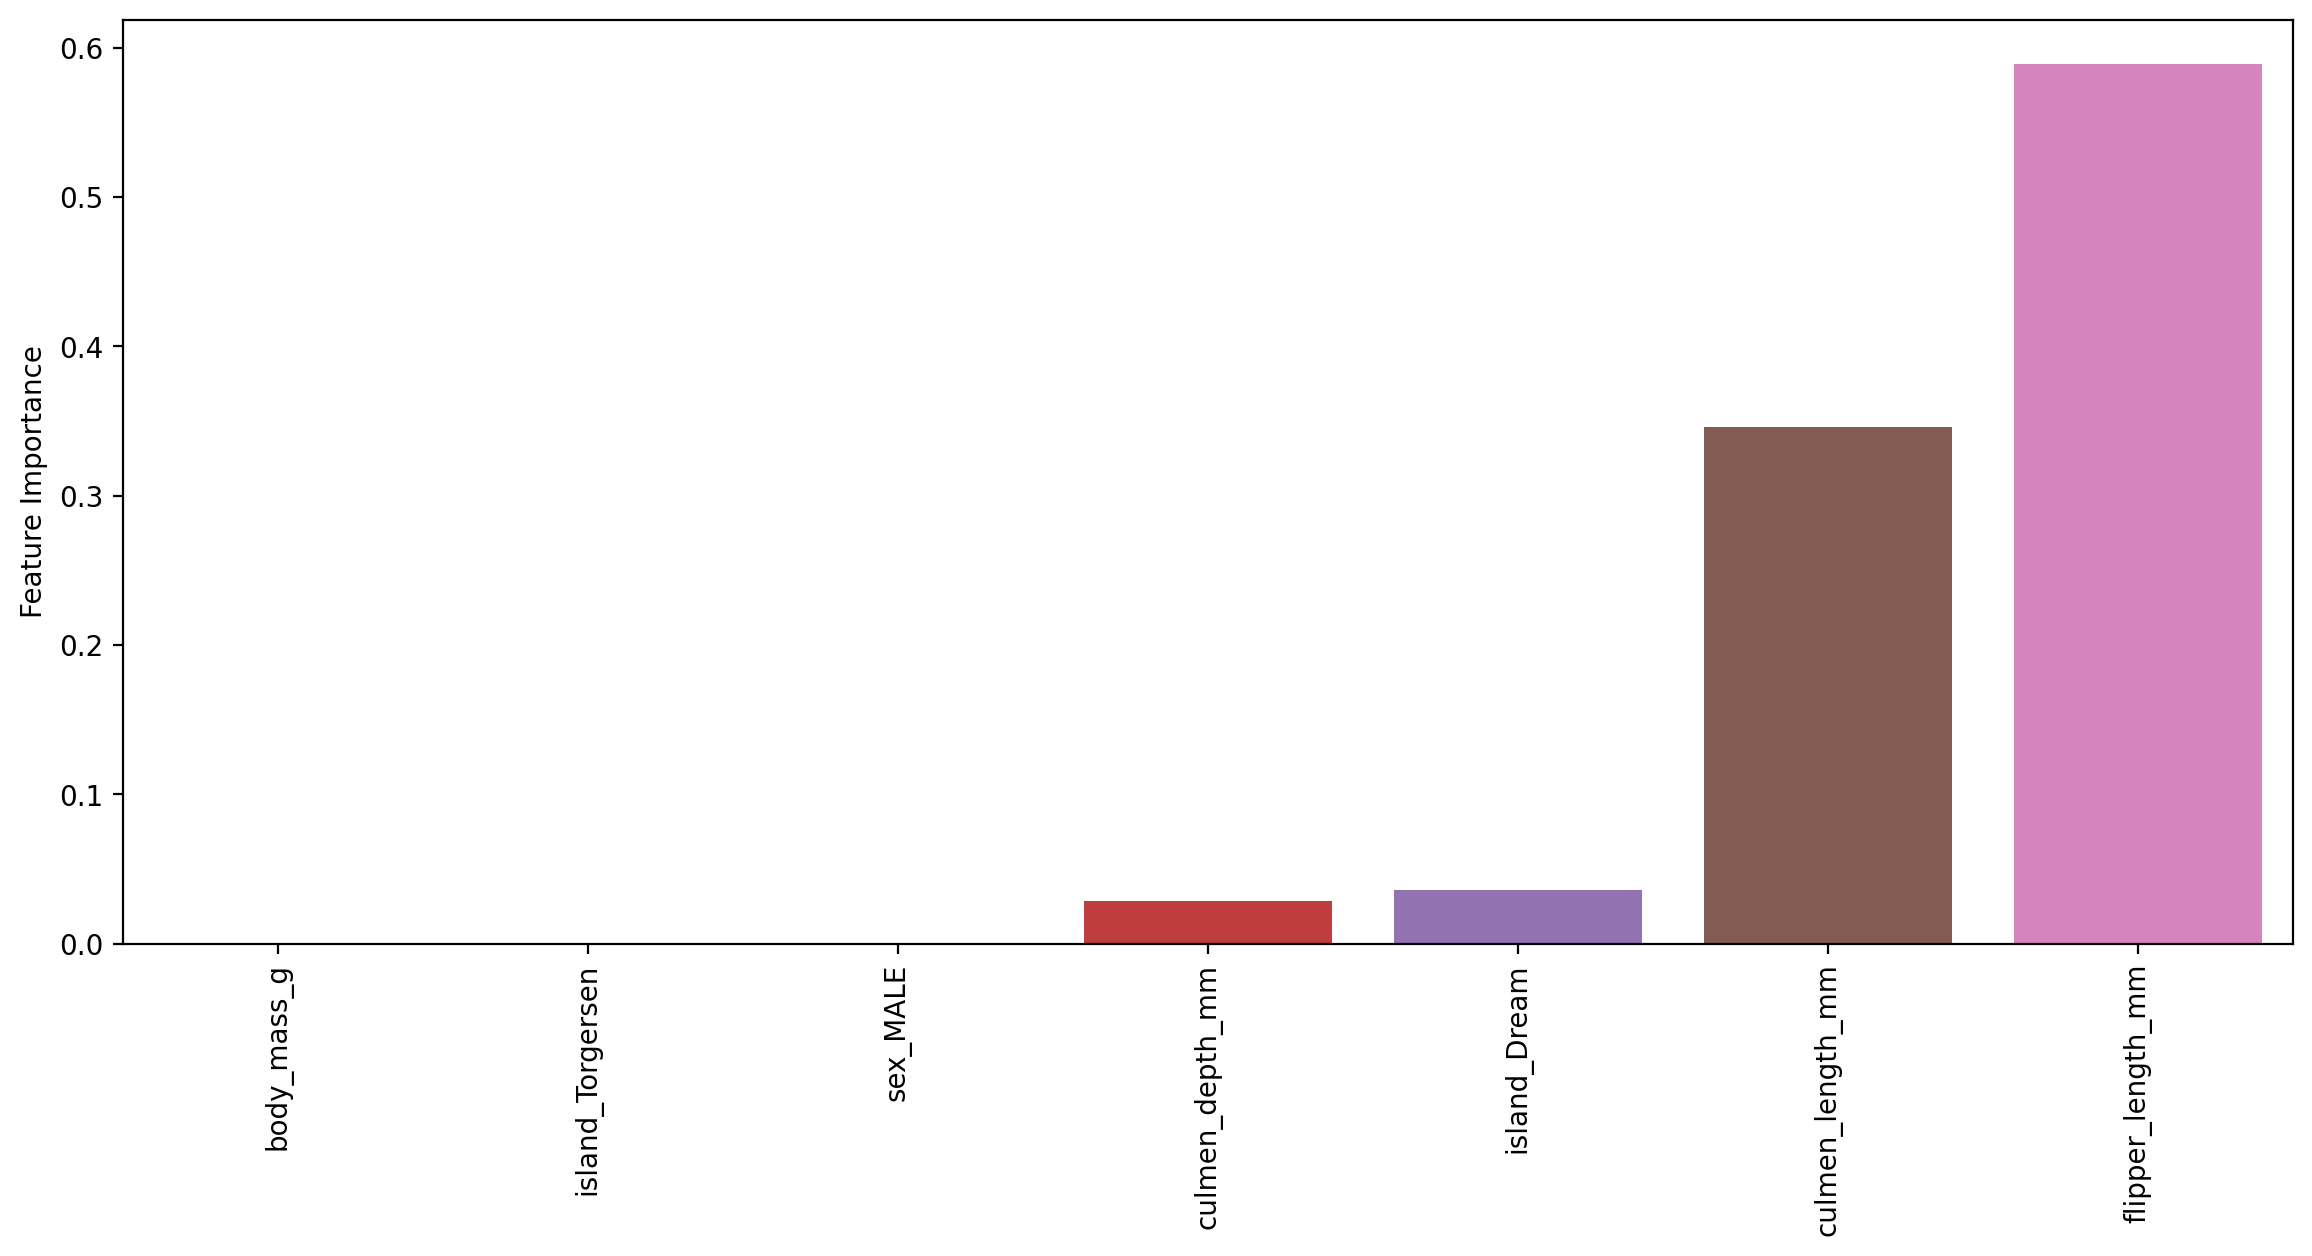

In [89]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feat.sort_values('Feature Importance'),x=imp_feat.sort_values('Feature Importance').index,y='Feature Importance')

plt.xticks(rotation=90);

In [90]:
from sklearn.tree import plot_tree

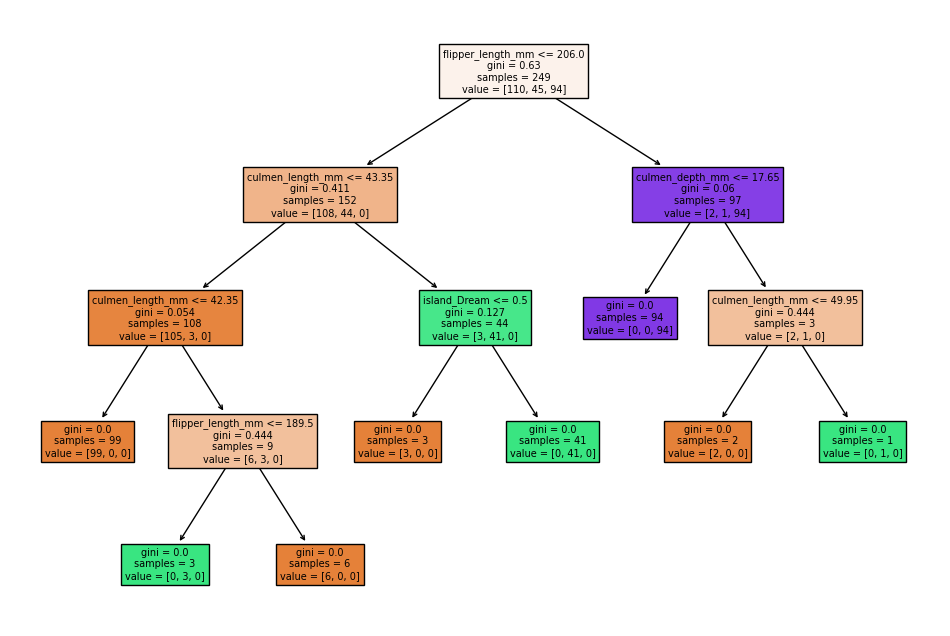

In [92]:
plt.figure(figsize=(12,8))
plot_tree(tree,filled=True,feature_names=X.columns);

In [93]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

### Hyperparameter of Decision Tree

In [94]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [95]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.85      0.97      0.91        36
   Chinstrap       0.89      0.74      0.81        23
      Gentoo       1.00      0.96      0.98        25

    accuracy                           0.90        84
   macro avg       0.92      0.89      0.90        84
weighted avg       0.91      0.90      0.90        84





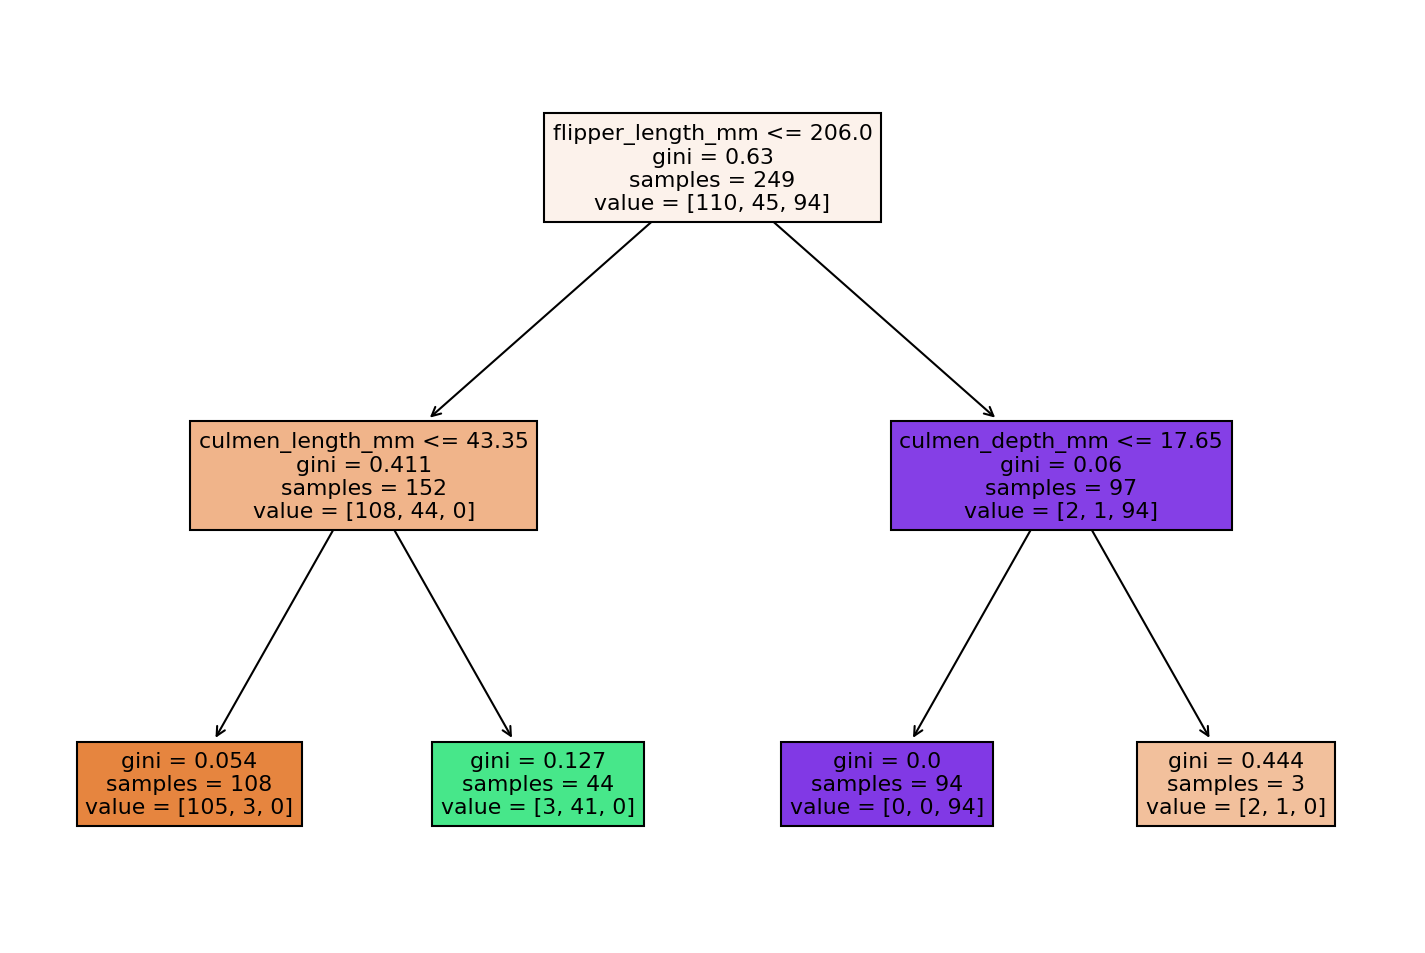

In [96]:
report_model(pruned_tree)

              precision    recall  f1-score   support

      Adelie       0.85      0.97      0.91        36
   Chinstrap       0.95      0.78      0.86        23
      Gentoo       1.00      0.96      0.98        25

    accuracy                           0.92        84
   macro avg       0.93      0.90      0.92        84
weighted avg       0.92      0.92      0.92        84





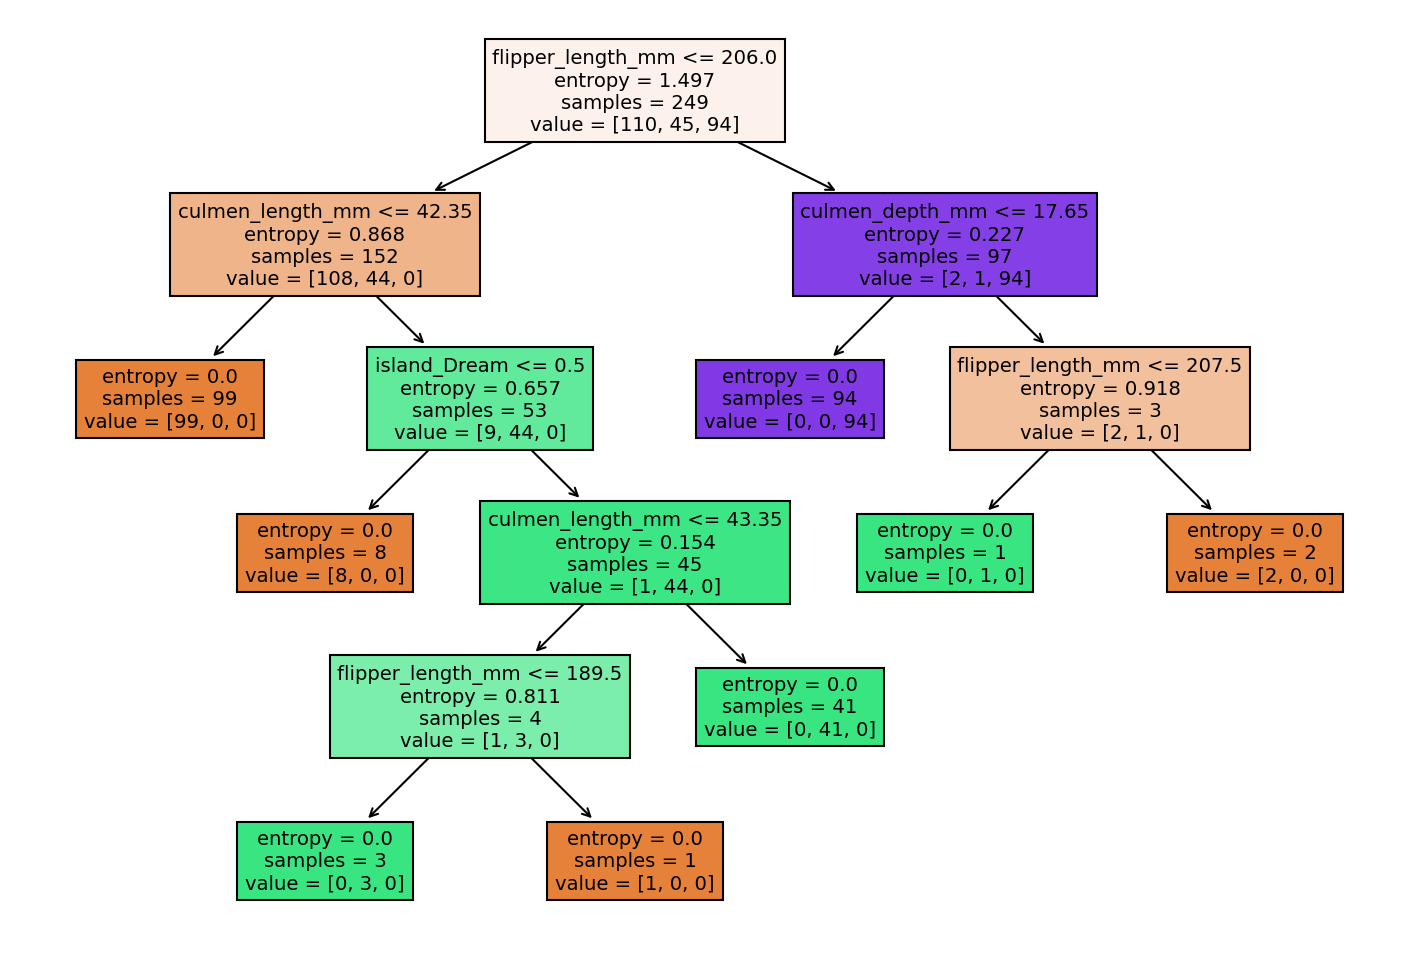

In [97]:
report_model(DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train))

              precision    recall  f1-score   support

      Adelie       0.90      0.97      0.93        36
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      0.96      0.98        25

    accuracy                           0.94        84
   macro avg       0.95      0.93      0.94        84
weighted avg       0.94      0.94      0.94        84





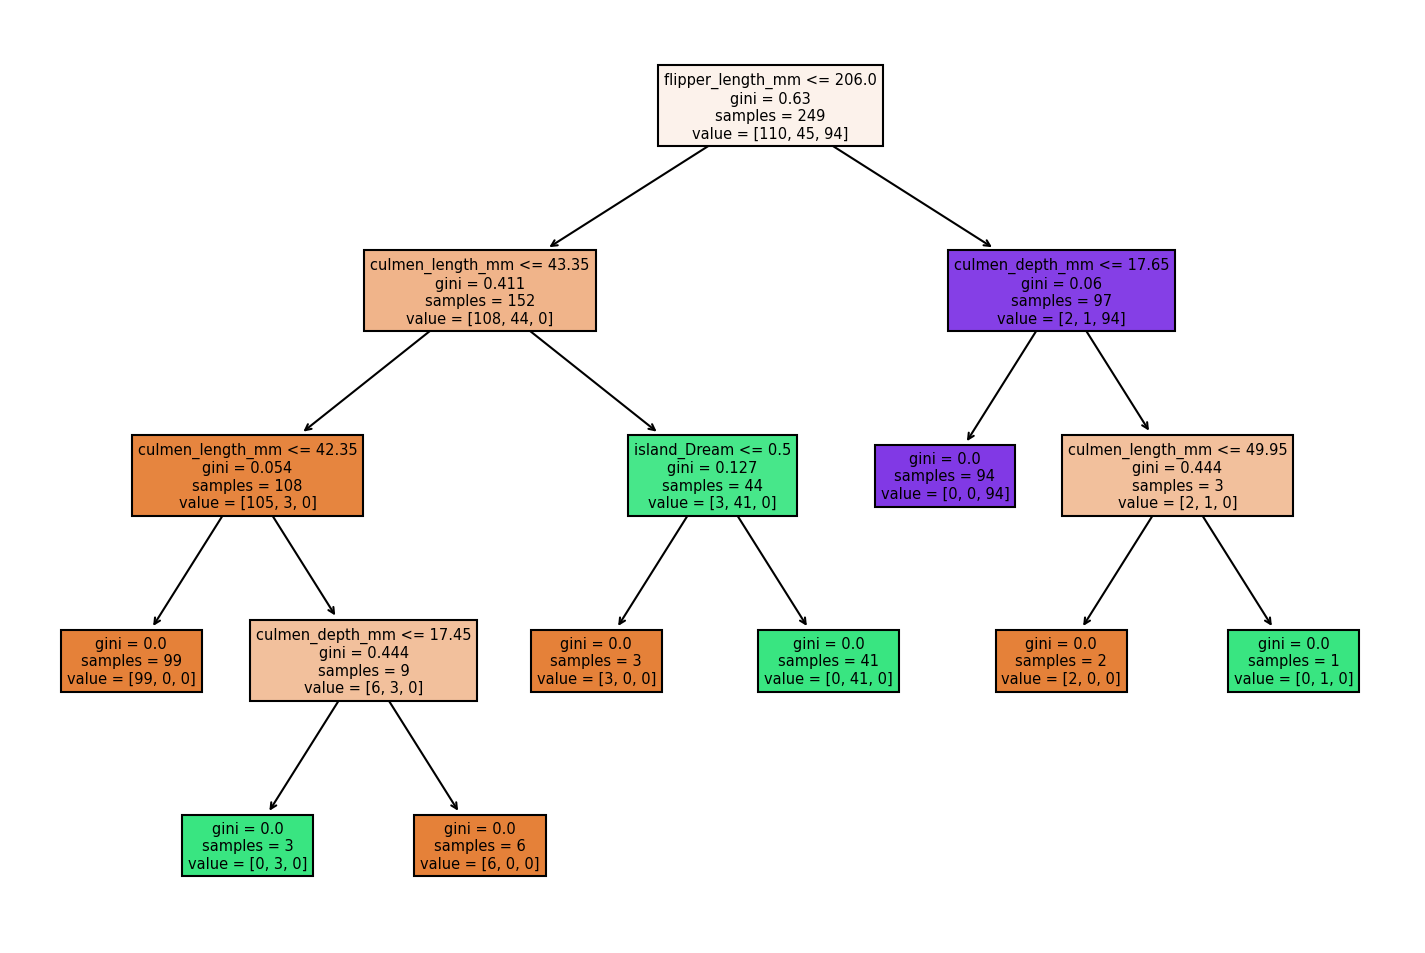

In [98]:
report_model(DecisionTreeClassifier(criterion='gini').fit(X_train, y_train))

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        36
   Chinstrap       0.89      0.74      0.81        23
      Gentoo       0.86      0.96      0.91        25

    accuracy                           0.90        84
   macro avg       0.90      0.89      0.89        84
weighted avg       0.91      0.90      0.90        84





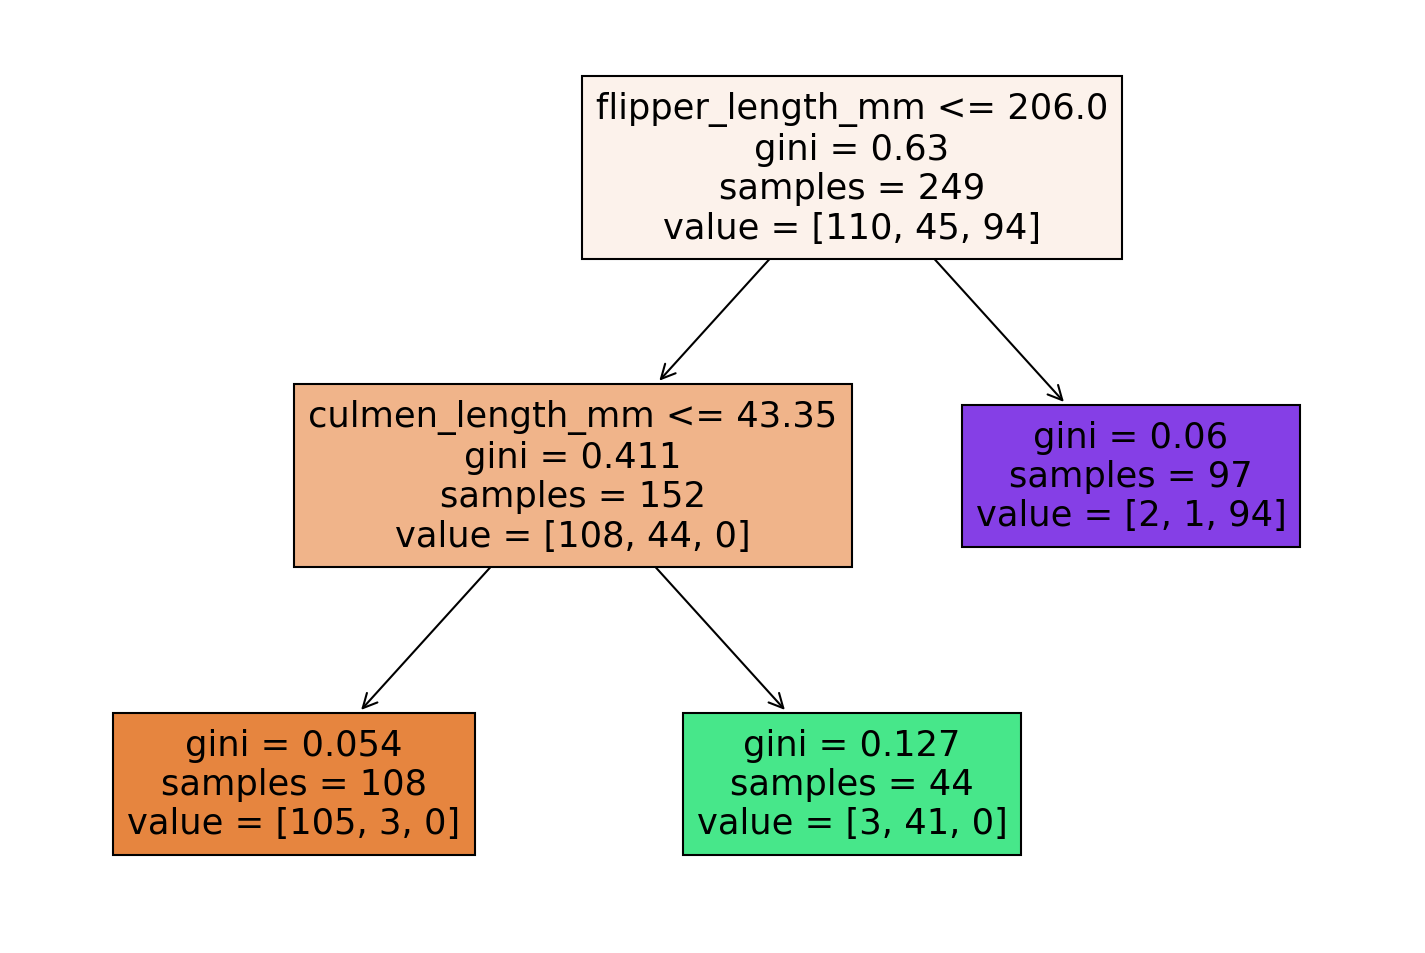

In [99]:
report_model(DecisionTreeClassifier(max_leaf_nodes=3).fit(X_train, y_train))

              precision    recall  f1-score   support

      Adelie       0.90      0.97      0.93        36
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      0.96      0.98        25

    accuracy                           0.94        84
   macro avg       0.95      0.93      0.94        84
weighted avg       0.94      0.94      0.94        84





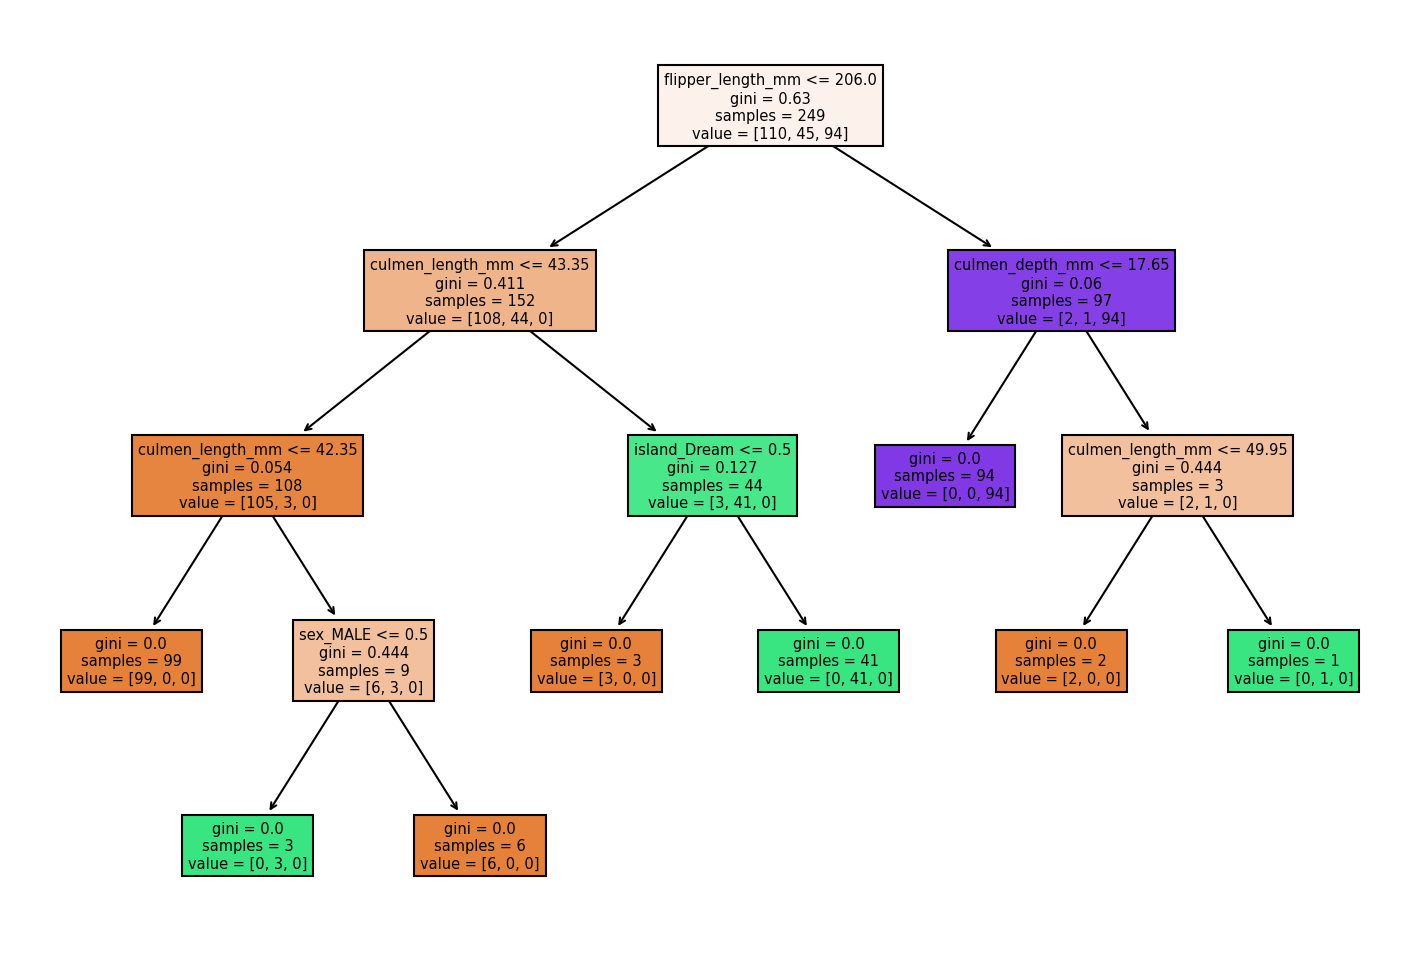

In [104]:
report_model(DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train))

- As we can see that in tunning of hyperparameters leds to better performance but we have to keep in mind that the tree might not be overfitted or under-fitted...
- Sometimes better performance can led to overfitting and the vice versa


In [106]:
from IPython.display import Image
Image(url='./overfitting and underfitting.jpg')